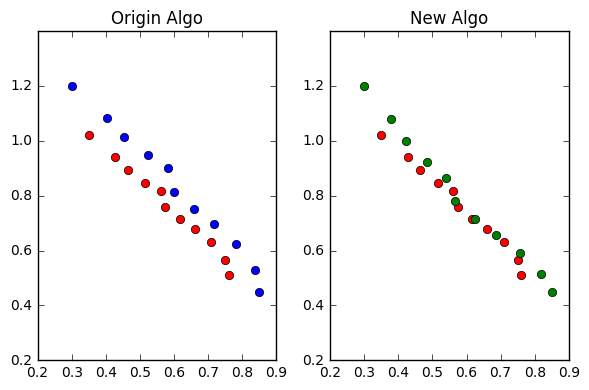

In [46]:
import numpy as np
import matplotlib.pylab as plt

#This is the tuning data.
ref_num = 11
led1_current = np.linspace(0,1000,ref_num)
ref_start = np.array([0.76, 0.51])
ref_end = np.array([0.35, 1.02])
ref_point = np.zeros([2, ref_num])

#Simulate the origin data, use linear interpolation plus random output
for i in range(ref_num - 1):
    ref_point[0, i] = ref_start[0] + float(i) / ref_num * (ref_end[0] - ref_start[0]) + np.random.random() / 30
    ref_point[1, i] = ref_start[1] + float(i) / ref_num * (ref_end[1] - ref_start[1]) + np.random.random() / 30

ref_point[:,0] = ref_start
ref_point[:,-1] = ref_end

plt.subplot(1,2,1)
plt.plot(ref_point[0], ref_point[1], 'ro')
plt.title("Origin Algo")
plt.ylim([0.2,1.4])

#This is calibration data for the start/end point
k_start = np.array([0.85,0.45])
k_end = np.array([0.30, 1.2])

#This is the original interpolation algo
k_point = np.zeros([2, ref_num])
for i in range(ref_num):
    a0 = (k_end[0] - k_start[0]) / (ref_end[0] - ref_start[0])
    k_point[0, i] = k_start[0] + a0 * (ref_point[0,i] - ref_start[0])
    
    a1 = (k_end[1] - k_start[1]) / (ref_end[1] - ref_start[1])
    k_point[1, i] = k_start[1] + a1 * (ref_point[1,i] - ref_start[1])

plt.plot(k_point[0], k_point[1], 'bo')

plt.subplot(1,2,2)
plt.plot(ref_point[0], ref_point[1], 'ro')
#This is the new interpolation algo
k_point_new = np.zeros([2, ref_num])
for i in range(ref_num):
    if i == 0:
        k_point_new[0, i] = k_start[0]
        k_point_new[1, i] = k_start[1]
    elif i == (ref_num - 1):
        k_point_new[0, i] = k_end[0]
        k_point_new[1, i] = k_end[1]
    else:
        a = float(led1_current[i] - led1_current[0]) / (led1_current[ref_num-1] - led1_current[0])
        k_point_new[0, i] = ref_point[0, i] * ((1-a) * k_start[0] / ref_start[0] + a * k_end[0] / ref_end[0])
        k_point_new[1, i] = ref_point[1, i] * ((1-a) * k_start[1] / ref_start[1] + a * k_end[1] / ref_end[1])

plt.plot(k_point_new[0], k_point_new[1], 'go')
plt.tight_layout()
plt.title("New Algo")
plt.ylim([0.2,1.4])
plt.show()
